In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (16,9)

import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [235]:
cars_df = pd.read_csv('/kaggle/input/toyotacorollacsv/ToyotaCorolla.csv', index_col = 0)

# Let's see a preview of the data
cars_df.head()

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,,,,,,,,,,,,,,,,,,,,,
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,0,...,1,1,1,0,0,0,1,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,0,...,1,0,1,0,0,0,1,0,0,0
3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,0,...,0,0,1,0,0,0,1,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,0,...,0,0,1,0,0,0,1,0,0,0
5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,0,...,1,1,1,0,1,0,1,0,0,0


In [236]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 1 to 1442
Data columns (total 36 columns):
Model               1436 non-null object
Price               1436 non-null int64
Age_08_04           1436 non-null int64
Mfg_Month           1436 non-null int64
Mfg_Year            1436 non-null int64
KM                  1436 non-null int64
Fuel_Type           1436 non-null object
HP                  1436 non-null int64
Met_Color           1436 non-null int64
Automatic           1436 non-null int64
cc                  1436 non-null int64
Doors               1436 non-null int64
Cylinders           1436 non-null int64
Gears               1436 non-null int64
Quarterly_Tax       1436 non-null int64
Weight              1436 non-null int64
Mfr_Guarantee       1436 non-null int64
BOVAG_Guarantee     1436 non-null int64
Guarantee_Period    1436 non-null int64
ABS                 1436 non-null int64
Airbag_1            1436 non-null int64
Airbag_2            1436 non-null int64
Airco      

In [237]:
cars_df.columns

Index(['Model', 'Price', 'Age_08_04', 'Mfg_Month', 'Mfg_Year', 'KM',
       'Fuel_Type', 'HP', 'Met_Color', 'Automatic', 'cc', 'Doors', 'Cylinders',
       'Gears', 'Quarterly_Tax', 'Weight', 'Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette',
       'Tow_Bar'],
      dtype='object')

In [238]:
cars = cars_df.copy(deep = True)   #true is default and false is for shallow copy
cars.head()

,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,,,,,,,,,,,,,,,,,,,,,
1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,0,...,1,1,1,0,0,0,1,0,0,0
2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,0,...,1,0,1,0,0,0,1,0,0,0
3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,0,...,0,0,1,0,0,0,1,0,0,0
4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,0,...,0,0,1,0,0,0,1,0,0,0
5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,0,...,1,1,1,0,1,0,1,0,0,0


In [239]:
cars.memory_usage().head()

Index        11488
Model        11488
Price        11488
Age_08_04    11488
Mfg_Month    11488
dtype: int64

In [240]:
cars.loc[:,['Fuel_Type','Price']].head(3)  #Access a group of rows and columns by label(s).

,Fuel_Type,Price
Id,,
1,Diesel,13500
2,Diesel,13750
3,Diesel,13950


In [241]:
cars.dtypes.value_counts()

int64     34
object     2
dtype: int64

In [242]:
#cars_cpy.select_dtypes(include = None, exclude = None).head(2) #default

In [243]:
cars.select_dtypes(exclude = [object]).head(3)  

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Id,,,,,,,,,,,,,,,,,,,,,
1,13500,23,10,2002,46986,90,1,0,2000,3,...,1,1,1,0,0,0,1,0,0,0
2,13750,23,10,2002,72937,90,1,0,2000,3,...,1,0,1,0,0,0,1,0,0,0
3,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,1,0,0,0,1,0,0,0


In [244]:
cars.info()  #entries are 1436, row labels are 1 to 1442

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 1 to 1442
Data columns (total 36 columns):
Model               1436 non-null object
Price               1436 non-null int64
Age_08_04           1436 non-null int64
Mfg_Month           1436 non-null int64
Mfg_Year            1436 non-null int64
KM                  1436 non-null int64
Fuel_Type           1436 non-null object
HP                  1436 non-null int64
Met_Color           1436 non-null int64
Automatic           1436 non-null int64
cc                  1436 non-null int64
Doors               1436 non-null int64
Cylinders           1436 non-null int64
Gears               1436 non-null int64
Quarterly_Tax       1436 non-null int64
Weight              1436 non-null int64
Mfr_Guarantee       1436 non-null int64
BOVAG_Guarantee     1436 non-null int64
Guarantee_Period    1436 non-null int64
ABS                 1436 non-null int64
Airbag_1            1436 non-null int64
Airbag_2            1436 non-null int64
Airco      

In [245]:
print(np.unique(cars['Doors']))
print(np.unique(cars['cc']))
print(np.unique(cars['Automatic']))

[2 3 4 5]
[ 1300  1332  1398  1400  1587  1598  1600  1800  1900  1975  1995  2000
 16000]
[0 1]


In [246]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 1 to 1442
Data columns (total 36 columns):
Model               1436 non-null object
Price               1436 non-null int64
Age_08_04           1436 non-null int64
Mfg_Month           1436 non-null int64
Mfg_Year            1436 non-null int64
KM                  1436 non-null int64
Fuel_Type           1436 non-null object
HP                  1436 non-null int64
Met_Color           1436 non-null int64
Automatic           1436 non-null int64
cc                  1436 non-null int64
Doors               1436 non-null int64
Cylinders           1436 non-null int64
Gears               1436 non-null int64
Quarterly_Tax       1436 non-null int64
Weight              1436 non-null int64
Mfr_Guarantee       1436 non-null int64
BOVAG_Guarantee     1436 non-null int64
Guarantee_Period    1436 non-null int64
ABS                 1436 non-null int64
Airbag_1            1436 non-null int64
Airbag_2            1436 non-null int64
Airco      

In [247]:
cars['Met_Color'] = cars['Met_Color'].astype('object')
cars['Automatic'] = cars['Automatic'].astype('object')


In [248]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 1 to 1442
Data columns (total 36 columns):
Model               1436 non-null object
Price               1436 non-null int64
Age_08_04           1436 non-null int64
Mfg_Month           1436 non-null int64
Mfg_Year            1436 non-null int64
KM                  1436 non-null int64
Fuel_Type           1436 non-null object
HP                  1436 non-null int64
Met_Color           1436 non-null object
Automatic           1436 non-null object
cc                  1436 non-null int64
Doors               1436 non-null int64
Cylinders           1436 non-null int64
Gears               1436 non-null int64
Quarterly_Tax       1436 non-null int64
Weight              1436 non-null int64
Mfr_Guarantee       1436 non-null int64
BOVAG_Guarantee     1436 non-null int64
Guarantee_Period    1436 non-null int64
ABS                 1436 non-null int64
Airbag_1            1436 non-null int64
Airbag_2            1436 non-null int64
Airco    

In [249]:
cars.isnull().sum()

Model               0
Price               0
Age_08_04           0
Mfg_Month           0
Mfg_Year            0
KM                  0
Fuel_Type           0
HP                  0
Met_Color           0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Quarterly_Tax       0
Weight              0
Mfr_Guarantee       0
BOVAG_Guarantee     0
Guarantee_Period    0
ABS                 0
Airbag_1            0
Airbag_2            0
Airco               0
Automatic_airco     0
Boardcomputer       0
CD_Player           0
Central_Lock        0
Powered_Windows     0
Power_Steering      0
Radio               0
Mistlamps           0
Sport_Model         0
Backseat_Divider    0
Metallic_Rim        0
Radio_cassette      0
Tow_Bar             0
dtype: int64

In [250]:
columns_to_drop = ['Model','Mfg_Month', 'Mfg_Year','Cylinders',
       'Gears', 'Quarterly_Tax','Mfr_Guarantee', 'BOVAG_Guarantee',
       'Guarantee_Period', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco',
       'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock',
       'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps',
       'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette','Tow_Bar']
cars.drop(columns_to_drop, axis = 1, inplace= True)
cars.sample(5)
     

,Price,Age_08_04,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,Weight
Id,,,,,,,,,,
1317,9250,78,69000,Petrol,110,1,0,1600,5,1075
383,7000,53,176000,Diesel,69,0,0,1900,3,1105
218,13500,33,75699,Diesel,69,0,0,1900,3,1105
557,10995,50,41273,Petrol,97,0,0,1400,5,1060
187,18245,1,1,Petrol,110,1,0,1600,5,1075


In [251]:

cars.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age_08_04,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
cc,1436.0,1576.855850,424.386770,1300.0,1400.0,1600.0,1600.00,16000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0
Weight,1436.0,1072.459610,52.641120,1000.0,1040.0,1070.0,1085.00,1615.0


In [252]:
cars.rename(columns = {'Age_08_04':'Age_Months', 'cc':'CC'}, inplace = True)
cars.sample(2)

,Price,Age_Months,KM,Fuel_Type,HP,Met_Color,Automatic,CC,Doors,Weight
Id,,,,,,,,,,
1238,6750,76,83405,Petrol,110,1,0,1600,5,1070
1337,8950,71,65021,Diesel,72,1,0,2000,3,1115


In [253]:
cars.insert(10, "Price_Class", " ")

In [254]:
for i in range(0, len(cars['Price']), 1):
    if cars['Price'].iloc[i] <= 8450:
        cars["Price_Class"].iloc[i] = 'Cheap'
    elif cars['Price'].iloc[i] >= 11950:
         cars["Price_Class"].iloc[i] = 'Expensive'
    else:
        cars['Price_Class'].iloc[i] = 'Average'
        

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [255]:
cars.insert(11, "Age", " ")

In [256]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
Price,1436.0,10730.824513,3626.964585,4350.0,8450.0,9900.0,11950.00,32500.0
Age_Months,1436.0,55.947075,18.599988,1.0,44.0,61.0,70.00,80.0
KM,1436.0,68533.259749,37506.448872,1.0,43000.0,63389.5,87020.75,243000.0
HP,1436.0,101.502089,14.981080,69.0,90.0,110.0,110.00,192.0
CC,1436.0,1576.855850,424.386770,1300.0,1400.0,1600.0,1600.00,16000.0
Doors,1436.0,4.033426,0.952677,2.0,3.0,4.0,5.00,5.0
Weight,1436.0,1072.459610,52.641120,1000.0,1040.0,1070.0,1085.00,1615.0


In [257]:
i = 0
while i < len(cars['Age_Months']):
    if cars['Age_Months'].iloc[i] <= 44:
        cars['Age'].iloc[i] = 'New Model'
        
    elif cars['Age_Months'].iloc[i] >= 70:
        cars['Age'].iloc[i] = 'Very Old'
               
    else:
        cars['Age'].iloc[i] = 'Old'
    i+=1           

In [258]:
cars['Age'].value_counts()

Old          689
New Model    378
Very Old     369
Name: Age, dtype: int64

In [259]:
cars['Price_Class'].value_counts()

Average      704
Cheap        369
Expensive    363
Name: Price_Class, dtype: int64

In [260]:
cars.head()

,Price,Age_Months,KM,Fuel_Type,HP,Met_Color,Automatic,CC,Doors,Weight,Price_Class,Age
Id,,,,,,,,,,,,
1,13500,23,46986,Diesel,90,1,0,2000,3,1165,Expensive,New Model
2,13750,23,72937,Diesel,90,1,0,2000,3,1165,Expensive,New Model
3,13950,24,41711,Diesel,90,1,0,2000,3,1165,Expensive,New Model
4,14950,26,48000,Diesel,90,0,0,2000,3,1165,Expensive,New Model
5,13750,30,38500,Diesel,90,0,0,2000,3,1170,Expensive,New Model


In [261]:
cars.insert(12, "Age-Year",0)

In [262]:
cars.insert(12, 'KM/Month', 0)

In [263]:
cars.head()

,Price,Age_Months,KM,Fuel_Type,HP,Met_Color,Automatic,CC,Doors,Weight,Price_Class,Age,KM/Month,Age-Year
Id,,,,,,,,,,,,,,
1,13500,23,46986,Diesel,90,1,0,2000,3,1165,Expensive,New Model,0,0
2,13750,23,72937,Diesel,90,1,0,2000,3,1165,Expensive,New Model,0,0
3,13950,24,41711,Diesel,90,1,0,2000,3,1165,Expensive,New Model,0,0
4,14950,26,48000,Diesel,90,0,0,2000,3,1165,Expensive,New Model,0,0
5,13750,30,38500,Diesel,90,0,0,2000,3,1170,Expensive,New Model,0,0


In [264]:
def conversion(val1, val2):
    val_con = val1/12
    ratio   = val2/val1
    return [val_con, ratio]

In [265]:
cars['Age-Year'], cars['KM/Month'] = conversion(cars['Age_Months'], cars['KM'])


In [266]:
cars.sample(5)

,Price,Age_Months,KM,Fuel_Type,HP,Met_Color,Automatic,CC,Doors,Weight,Price_Class,Age,KM/Month,Age-Year
Id,,,,,,,,,,,,,,
392,9450,54,138394,Diesel,69,1,0,1900,4,1095,Average,Old,2562.851852,4.500000
831,9650,67,69000,Petrol,110,1,0,1600,3,1065,Average,Old,1029.850746,5.583333
172,18245,9,1,Petrol,110,1,0,1600,5,1075,Expensive,New Model,0.111111,0.750000
1364,7900,76,60000,Petrol,110,0,0,1600,3,1050,Cheap,Very Old,789.473684,6.333333
827,10500,67,70000,Petrol,107,1,1,1587,3,1065,Average,Old,1044.776119,5.583333


In [267]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1436 entries, 1 to 1442
Data columns (total 14 columns):
Price          1436 non-null int64
Age_Months     1436 non-null int64
KM             1436 non-null int64
Fuel_Type      1436 non-null object
HP             1436 non-null int64
Met_Color      1436 non-null object
Automatic      1436 non-null object
CC             1436 non-null int64
Doors          1436 non-null int64
Weight         1436 non-null int64
Price_Class    1436 non-null object
Age            1436 non-null object
KM/Month       1436 non-null float64
Age-Year       1436 non-null float64
dtypes: float64(2), int64(7), object(5)
memory usage: 168.3+ KB


In [268]:
pd.crosstab(index = cars['Fuel_Type'], columns = 'count', dropna = True)

col_0,count
Fuel_Type,
CNG,17
Diesel,155
Petrol,1264


In [269]:
pd.crosstab(index = cars['Automatic'], columns = cars['Fuel_Type'], dropna = True)  #two-way table

Fuel_Type,CNG,Diesel,Petrol
Automatic,,,
0,16,155,1185
1,1,0,79


In [270]:
pd.crosstab(index = cars['Automatic'], columns = cars['Fuel_Type'], normalize = True, dropna = True)  #two-way table, joint-probability

Fuel_Type,CNG,Diesel,Petrol
Automatic,,,
0,0.011142,0.107939,0.825209
1,0.000696,0.000000,0.055014


In [271]:
pd.crosstab(index = cars['Automatic'], columns = cars['Fuel_Type'],margins = True, normalize = True, dropna = True) #two-way table, marginal probability

Fuel_Type,CNG,Diesel,Petrol,All
Automatic,,,,
0,0.011142,0.107939,0.825209,0.94429
1,0.000696,0.000000,0.055014,0.05571
All,0.011838,0.107939,0.880223,1.00000


In [272]:
pd.crosstab(index = cars['Automatic'], columns = cars['Fuel_Type'],margins = True, normalize = 'index', dropna = True) #two-way-conditional-probability

Fuel_Type,CNG,Diesel,Petrol
Automatic,,,
0,0.011799,0.114307,0.873894
1,0.012500,0.000000,0.987500
All,0.011838,0.107939,0.880223


In [273]:
pd.crosstab(index = cars['Automatic'], columns = cars['Fuel_Type'],margins = True, normalize = 'columns', dropna = True)

Fuel_Type,CNG,Diesel,Petrol,All
Automatic,,,,
0,0.941176,1.0,0.9375,0.94429
1,0.058824,0.0,0.0625,0.05571


In [274]:
numerical_data = cars.select_dtypes(exclude = [object])
print(numerical_data.shape)

(1436, 9)


In [275]:
corr_matrix = numerical_data.corr()
corr_matrix

,Price,Age_Months,KM,HP,CC,Doors,Weight,KM/Month,Age-Year
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.581198,-0.023369,-0.876590
Age_Months,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.470253,-0.125711,1.000000
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,-0.028598,0.724024,0.505672
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.089614,-0.260631,-0.156622
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.335637,0.175403,-0.098084
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,0.302618,0.049075,-0.148359
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,1.000000,0.324752,-0.470253
KM/Month,-0.023369,-0.125711,0.724024,-0.260631,0.175403,0.049075,0.324752,1.000000,-0.125711
Age-Year,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.470253,-0.125711,1.000000


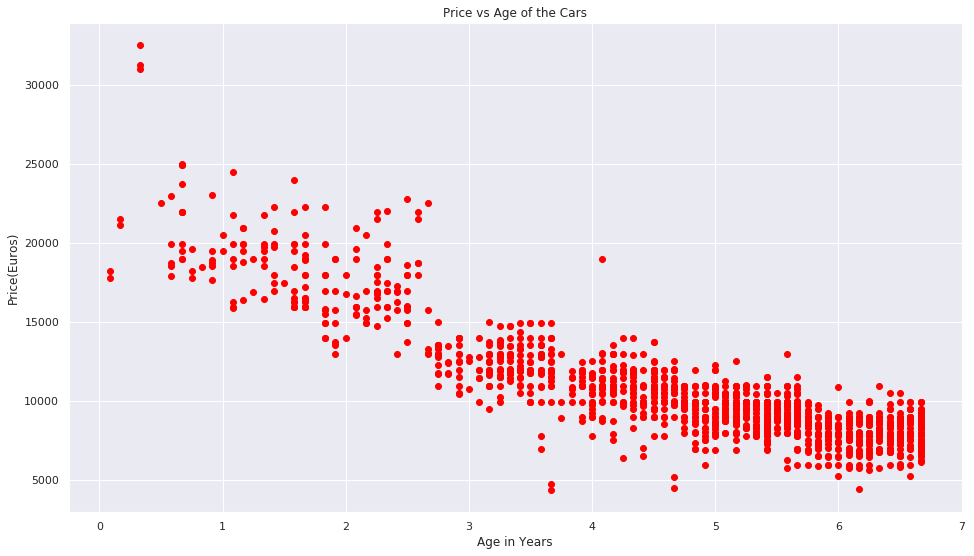

In [276]:
plt.scatter(cars['Age-Year'], cars['Price'], c = 'red')
plt.title('Price vs Age of the Cars')
plt.xlabel('Age in Years')
plt.ylabel('Price(Euros)')
plt.show()

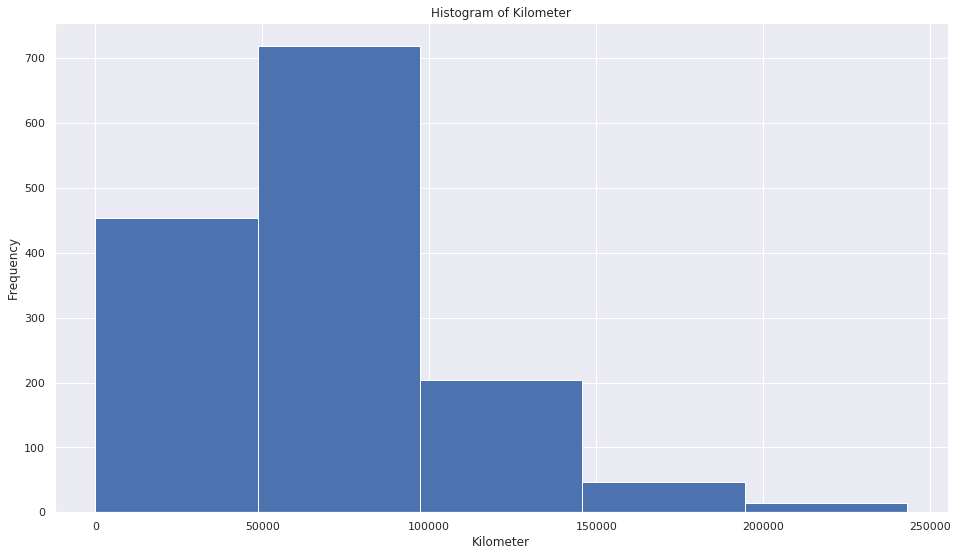

In [277]:
plt.hist(cars['KM'], edgecolor = 'white', bins = 5)
plt.title('Histogram of Kilometer')
plt.xlabel('Kilometer')
plt.ylabel('Frequency')
plt.show()

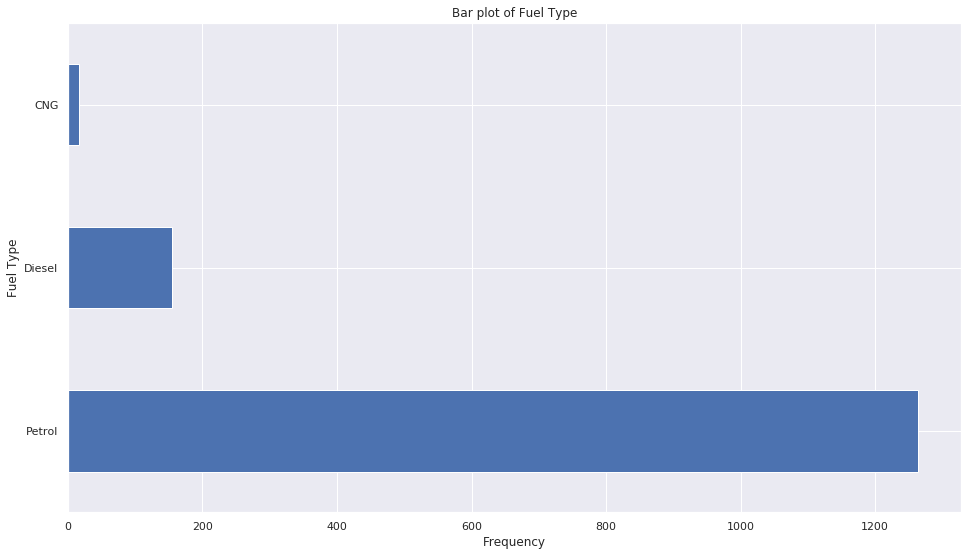

In [278]:
fuel_count = pd.value_counts(cars['Fuel_Type'].values, sort = True)
plt.xlabel('Frequency')
plt.ylabel('Fuel Type')
plt.title('Bar plot of Fuel Type')
fuel_count.plot.barh()

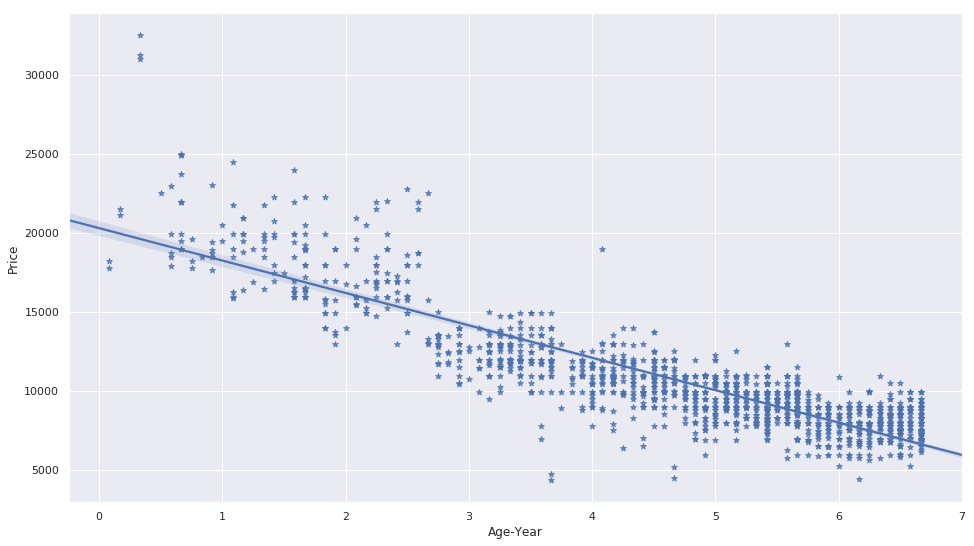

In [279]:
sns.set(style = 'darkgrid')
sns.regplot(x = cars['Age-Year'], y = cars['Price'], marker = '*')

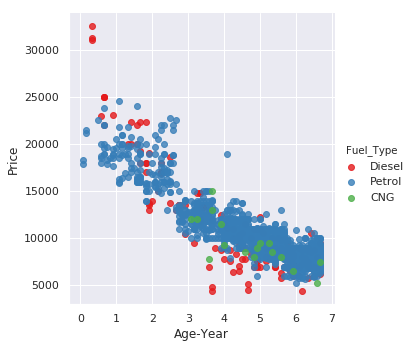

In [280]:
sns.lmplot(x = 'Age-Year', y = 'Price', data = cars, hue = 'Fuel_Type', fit_reg= False, legend = True, palette ='Set1')

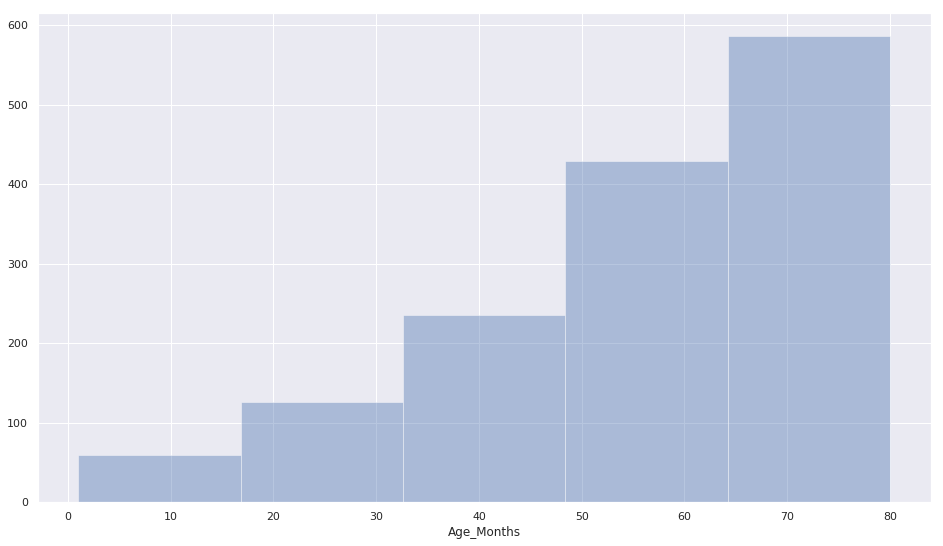

In [281]:
sns.distplot(cars['Age_Months'], kde = False, bins = 5)

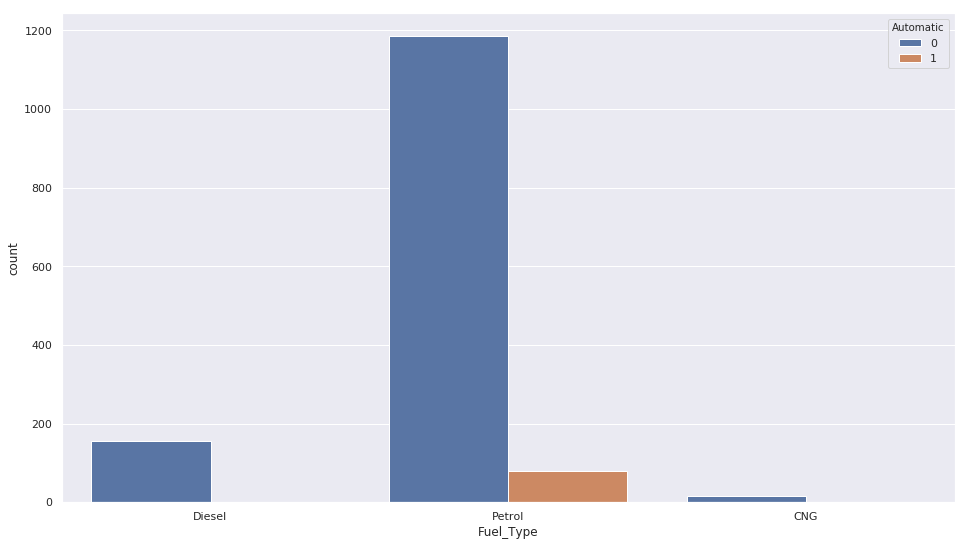

In [282]:
sns.countplot(x = 'Fuel_Type', data = cars, hue = 'Automatic')

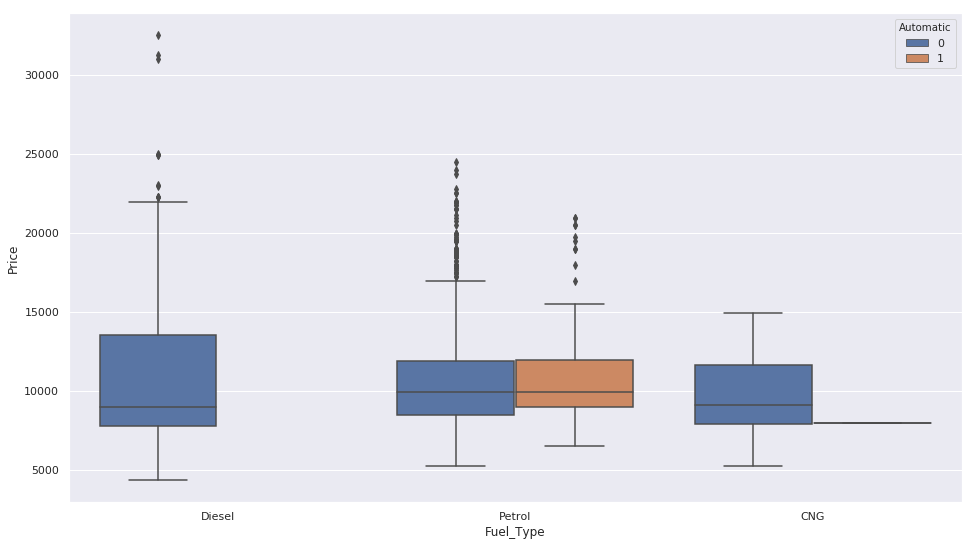

In [283]:
sns.boxplot(y = cars['Price'], x = cars['Fuel_Type'], hue = cars['Automatic'])

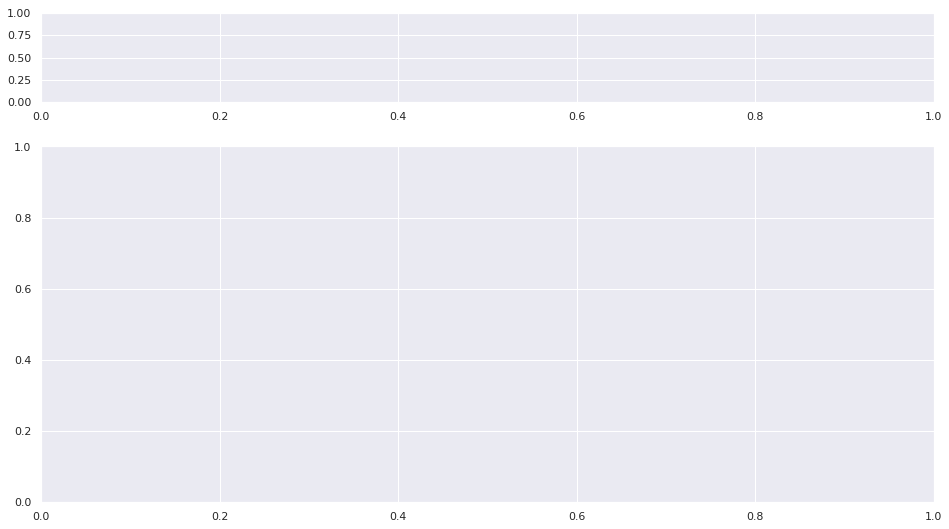

In [284]:
f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={'height_ratios':(.20,.80)})

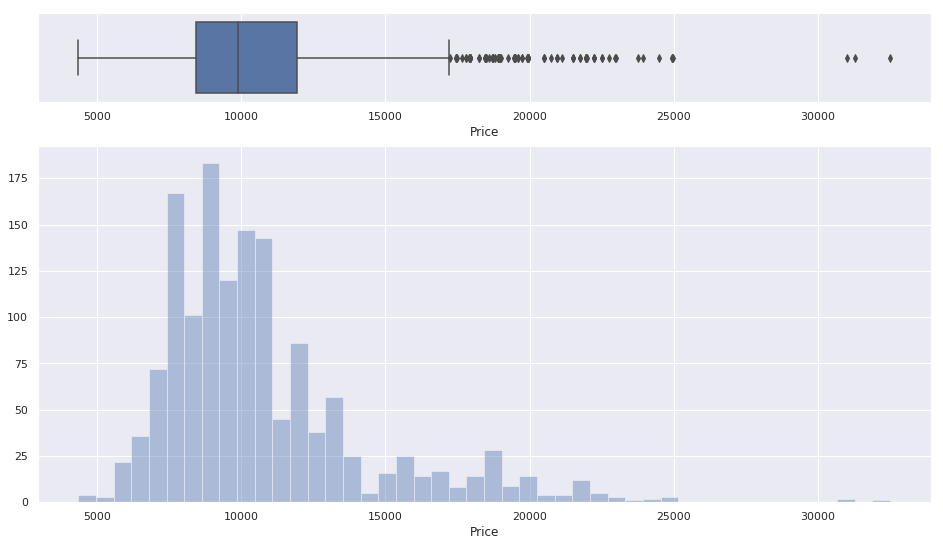

In [285]:
f, (ax_box, ax_hist) = plt.subplots(2, gridspec_kw={'height_ratios':(.20,.80)})
sns.boxplot(cars['Price'], ax = ax_box)
sns.distplot(cars['Price'], ax = ax_hist, kde = False)

/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


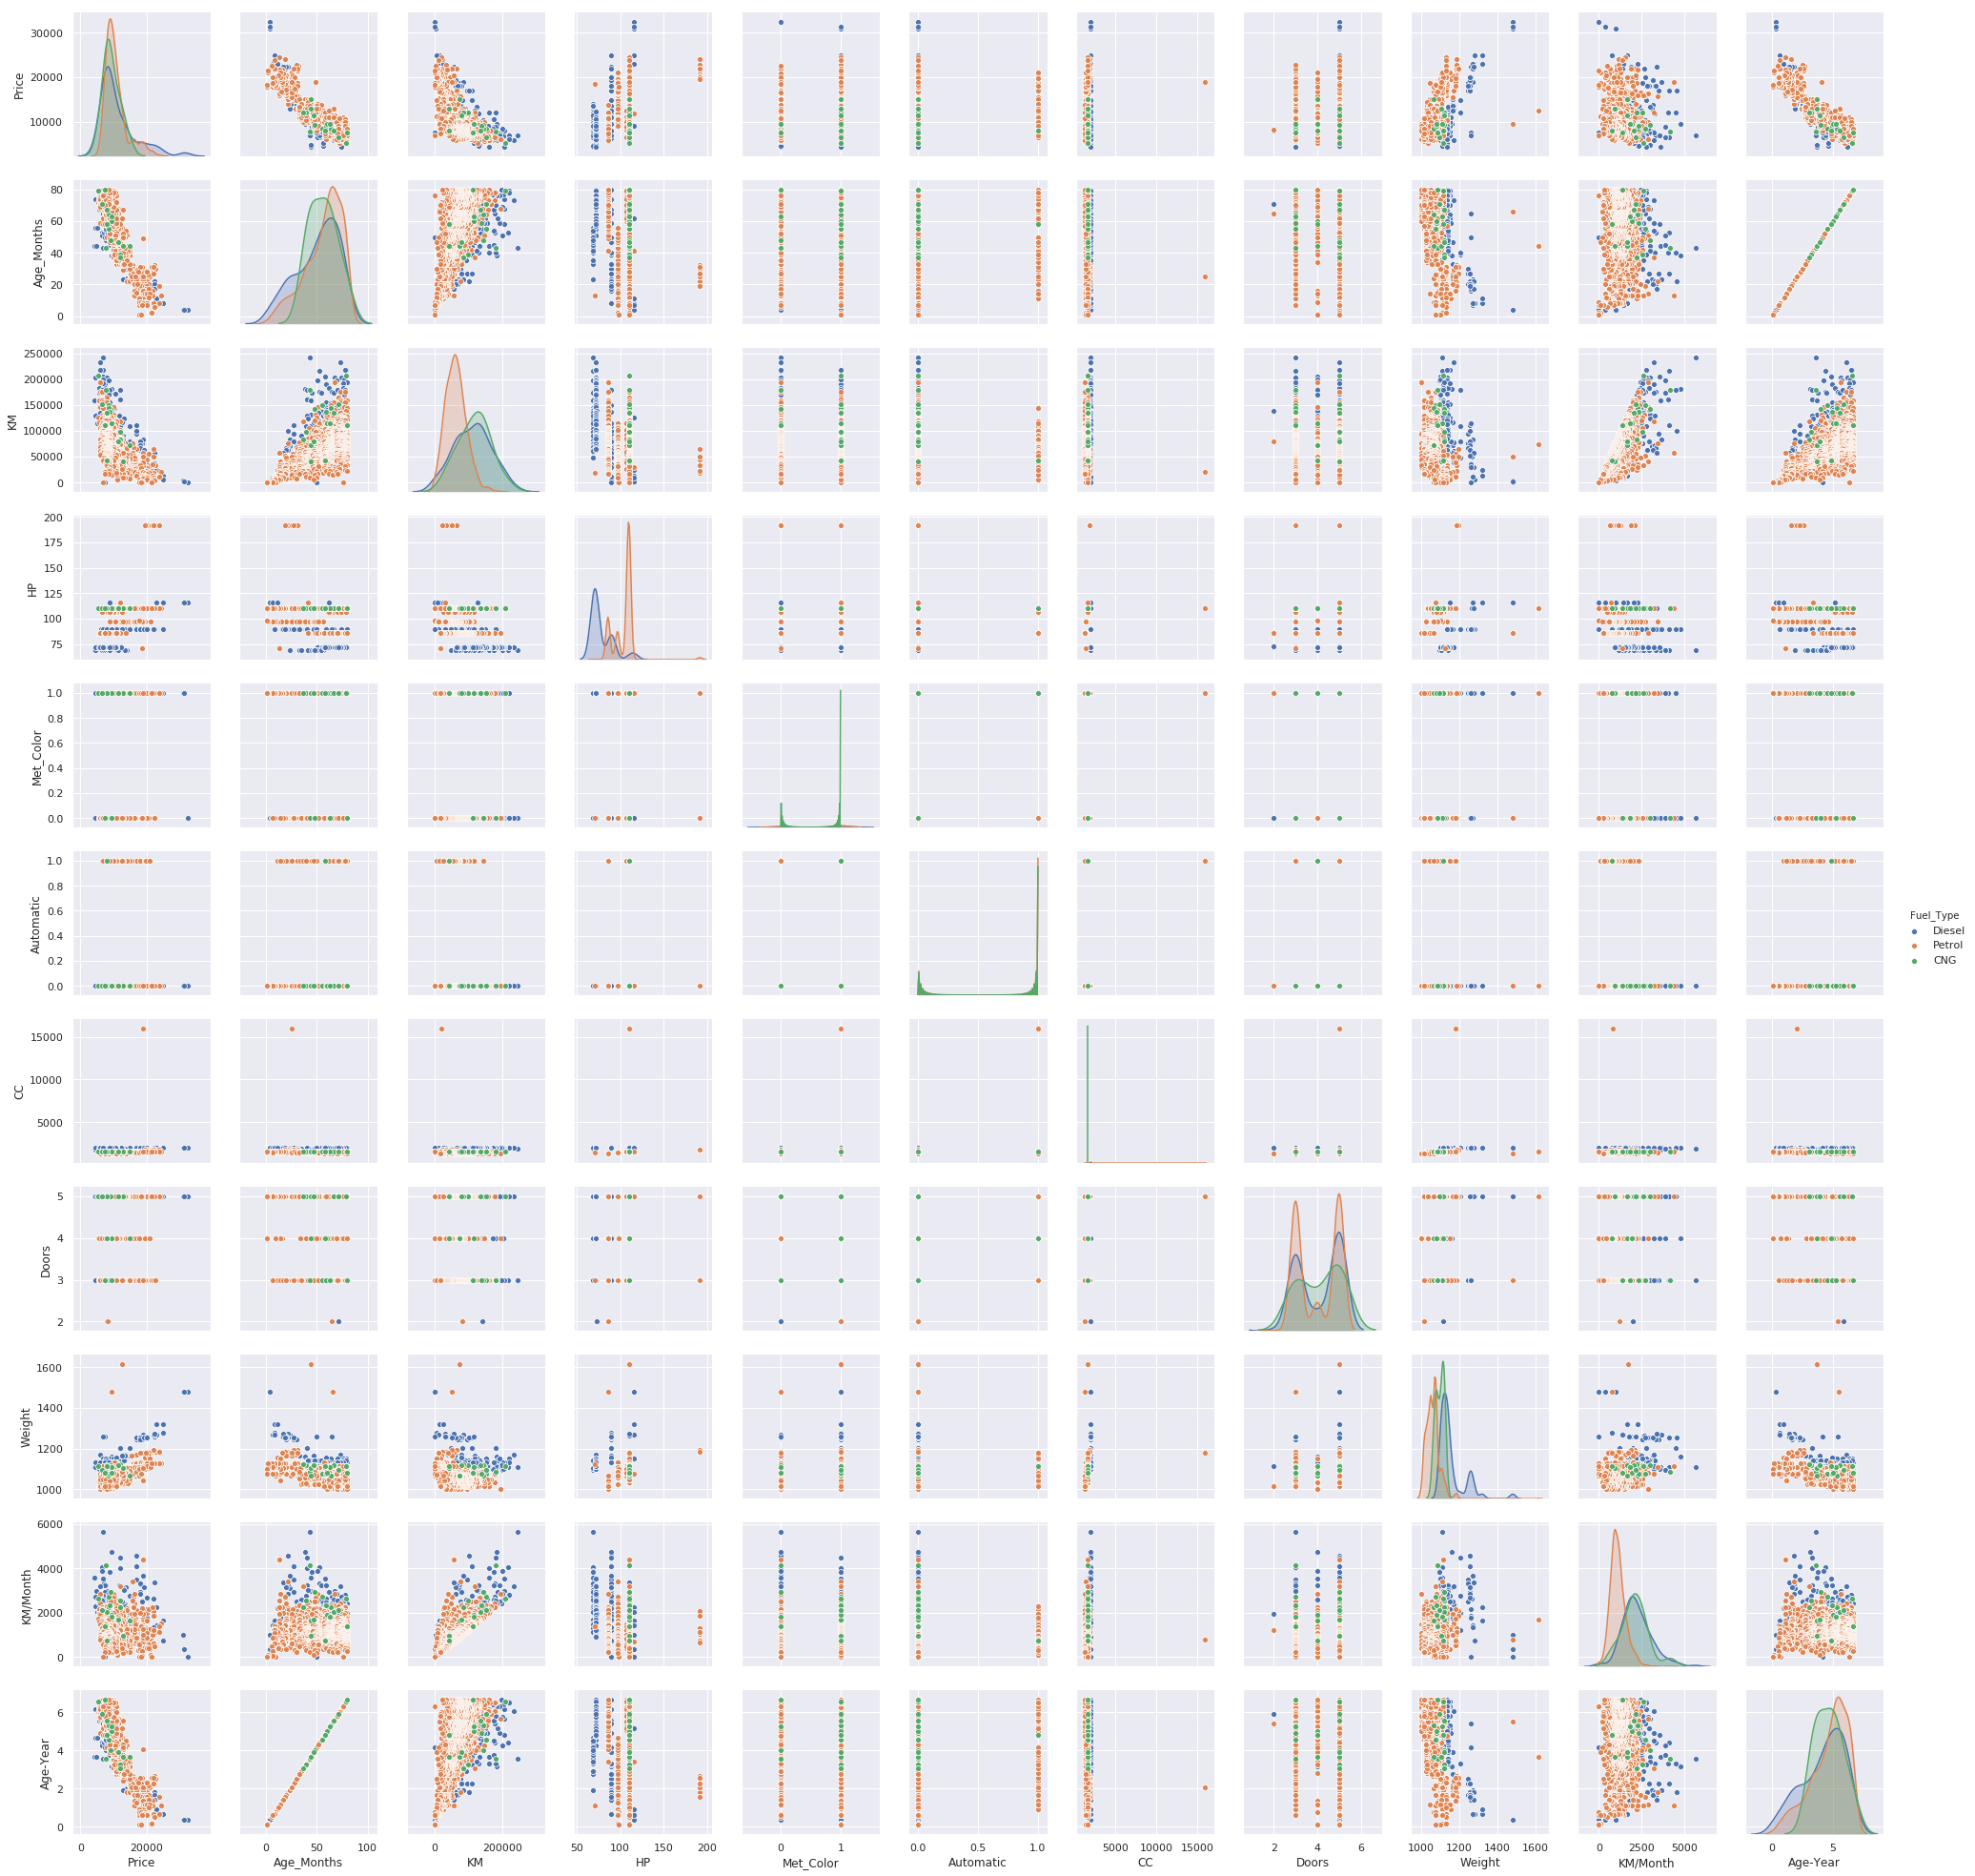

In [286]:
sns.pairplot(cars, kind = 'scatter', hue = 'Fuel_Type')

In [287]:
cars

,Price,Age_Months,KM,Fuel_Type,HP,Met_Color,Automatic,CC,Doors,Weight,Price_Class,Age,KM/Month,Age-Year
Id,,,,,,,,,,,,,,
1,13500,23,46986,Diesel,90,1,0,2000,3,1165,Expensive,New Model,2042.869565,1.916667
2,13750,23,72937,Diesel,90,1,0,2000,3,1165,Expensive,New Model,3171.173913,1.916667
3,13950,24,41711,Diesel,90,1,0,2000,3,1165,Expensive,New Model,1737.958333,2.000000
4,14950,26,48000,Diesel,90,0,0,2000,3,1165,Expensive,New Model,1846.153846,2.166667
5,13750,30,38500,Diesel,90,0,0,2000,3,1170,Expensive,New Model,1283.333333,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,7500,69,20544,Petrol,86,1,0,1300,3,1025,Cheap,Old,297.739130,5.750000
1439,10845,72,19000,Petrol,86,0,0,1300,3,1015,Average,Very Old,263.888889,6.000000
1440,8500,71,17016,Petrol,86,0,0,1300,3,1015,Average,Very Old,239.661972,5.916667


#### **Model Building**

In [288]:
model=smf.ols('Price~Age_Months+KM+HP+CC+Doors+Weight',data=cars).fit()

#### **Finding tvalues and pvalues**

In [289]:
model.params

Intercept    -4235.488758
Age_Months    -122.401535
KM              -0.019527
HP              30.477660
CC              -0.090831
Doors          -35.065900
Weight          18.969177
dtype: float64

In [290]:
model.tvalues , np.round(model.pvalues,5)

(Intercept     -4.453168
 Age_Months   -46.654063
 KM           -16.078713
 HP            11.962502
 CC            -1.009799
 Doors         -0.890740
 Weight        21.865811
 dtype: float64, Intercept     0.00001
 Age_Months    0.00000
 KM            0.00000
 HP            0.00000
 CC            0.31276
 Doors         0.37322
 Weight        0.00000
 dtype: float64)

#### **Finding rsquared values**

In [291]:
model.rsquared , model.rsquared_adj

(0.8619469563049698, 0.8613673074161172)

 #### **Build SLR and MLR models for insignificant variables 'CC' and 'Doors' & Also find their tvalues and pvalues**

In [292]:
slr_c=smf.ols('Price~CC',data=cars).fit()
slr_c.tvalues , slr_c.pvalues # CC has significant pvalue

(Intercept    24.694090
 CC            4.824822
 dtype: float64, Intercept    1.766912e-112
 CC            1.550808e-06
 dtype: float64)

In [293]:
slr_d=smf.ols('Price~Doors',data=cars).fit()
slr_d.tvalues , slr_d.pvalues # Doors has significant pvalue

(Intercept    19.258097
 Doors         7.141657
 dtype: float64, Intercept    1.094732e-73
 Doors        1.461237e-12
 dtype: float64)

In [294]:
mlr_cd=smf.ols('Price~CC+Doors',data=cars).fit()
mlr_cd.tvalues , mlr_cd.pvalues # CC & Doors have significant pvalue

(Intercept    12.620704
 CC            4.340400
 Doors         6.816153
 dtype: float64, Intercept    1.056885e-34
 CC           1.521992e-05
 Doors        1.373469e-11
 dtype: float64)

#### **Model Validation**

#### **Two Techniques**

1. Collinearity Check 
2. Residual Analysis


#### **1) Collinearity Problem Check**

In [295]:
rsq_age=smf.ols('Age_Months~KM+HP+CC+Doors+Weight',data=cars).fit().rsquared
vif_age=1/(1-rsq_age)

rsq_KM=smf.ols('KM~Age_Months+HP+CC+Doors+Weight',data=cars).fit().rsquared
vif_KM=1/(1-rsq_KM)

rsq_HP=smf.ols('HP~Age_Months+KM+CC+Doors+Weight',data=cars).fit().rsquared
vif_HP=1/(1-rsq_HP)

rsq_CC=smf.ols('CC~Age_Months+KM+HP+Doors+Weight',data=cars).fit().rsquared
vif_CC=1/(1-rsq_CC)

rsq_DR=smf.ols('Doors~Age_Months+KM+HP+CC+Weight',data=cars).fit().rsquared
vif_DR=1/(1-rsq_DR)

rsq_WT=smf.ols('Weight~Age_Months+KM+HP+CC+Doors',data=cars).fit().rsquared
vif_WT=1/(1-rsq_WT)

# Putting the values in Dataframe format
d1={'Variables':['Age_Months','KM','HP','CC','Doors','Weight'],
    'Vif':[vif_age,vif_KM,vif_HP,vif_CC,vif_DR,vif_WT]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,Age_Months,1.873785
1,KM,1.632574
2,HP,1.146318
3,CC,1.146623
4,Doors,1.106772
5,Weight,1.641027


#### **2) Residual Analysis**

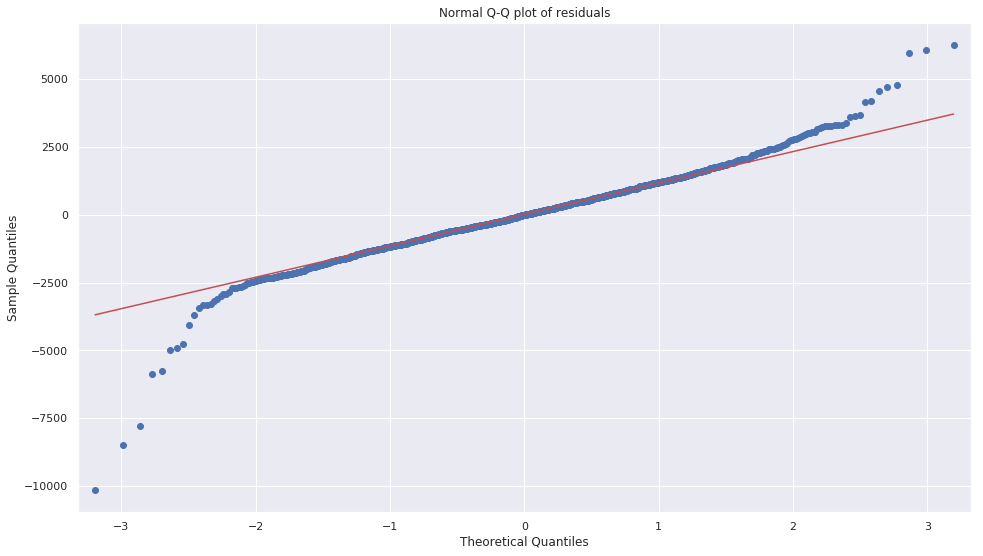

In [296]:
sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

#### **Outliar detection from above QQ plot of residuals**

In [297]:
list(np.where(model.resid>6000))

[array([147, 523])]

In [298]:
list(np.where(model.resid<-6000))

[array([221, 601, 960])]

In [299]:
def standard_values(vals) : return (vals-vals.mean())/vals.std()

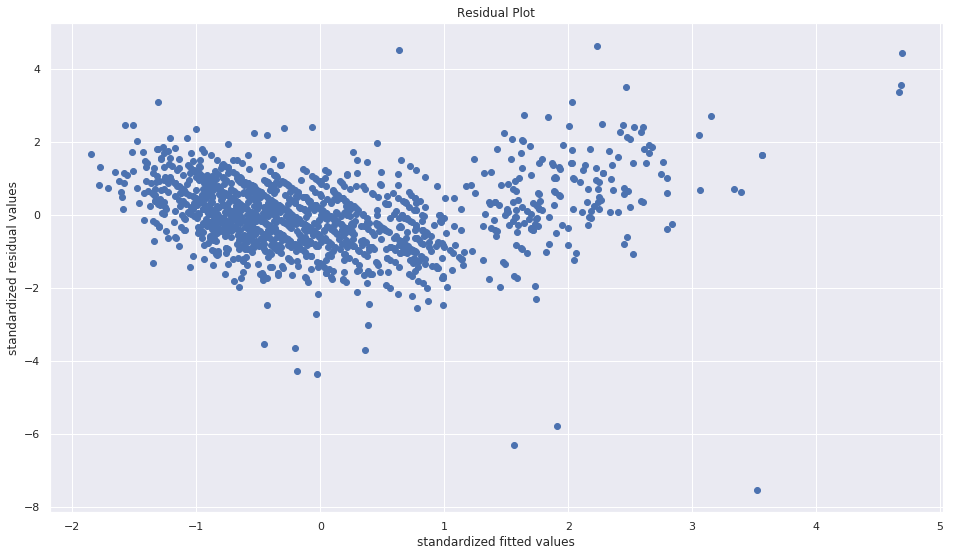

In [300]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

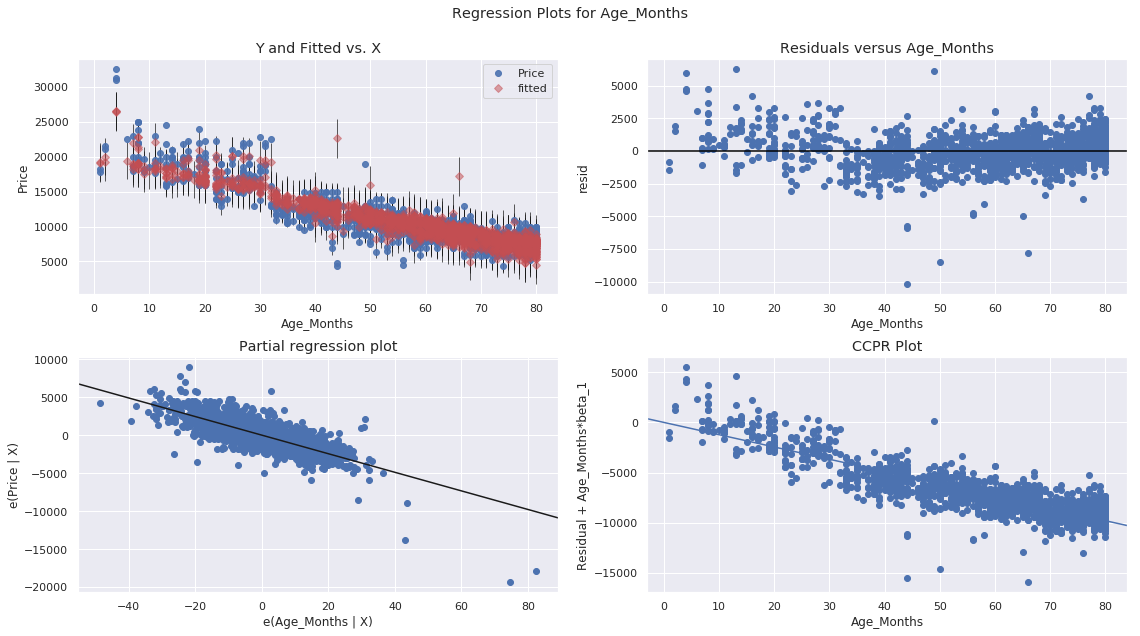

In [301]:
sm.graphics.plot_regress_exog(model,'Age_Months')
plt.show()

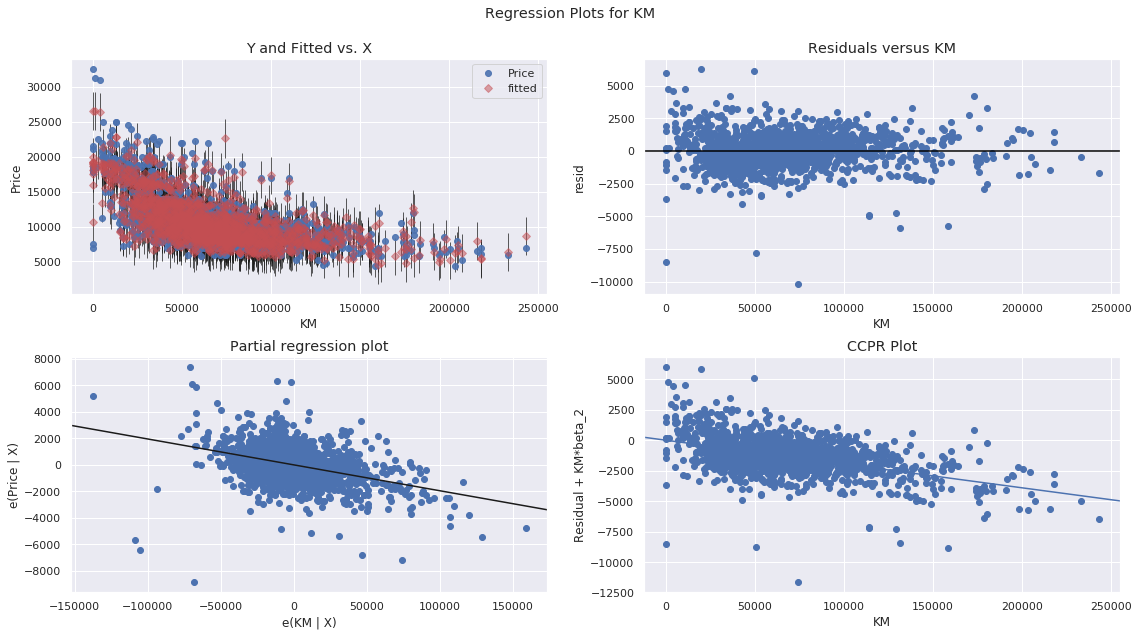

In [302]:
sm.graphics.plot_regress_exog(model,'KM')
plt.show()

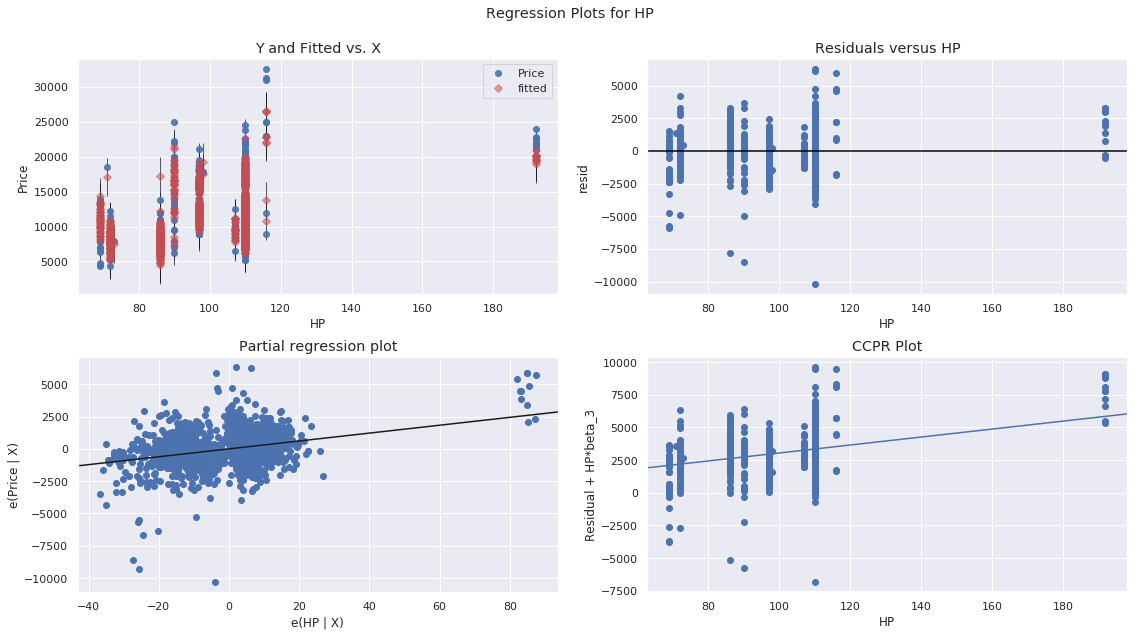

In [303]:
sm.graphics.plot_regress_exog(model,'HP')
plt.show()

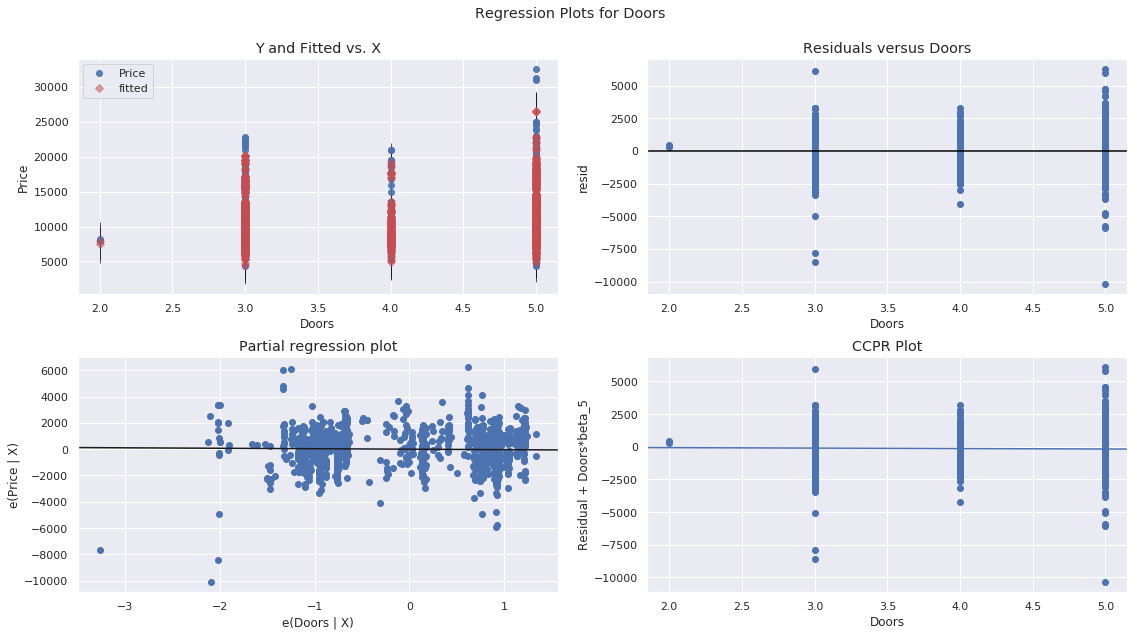

In [304]:
sm.graphics.plot_regress_exog(model,'Doors')
plt.show()

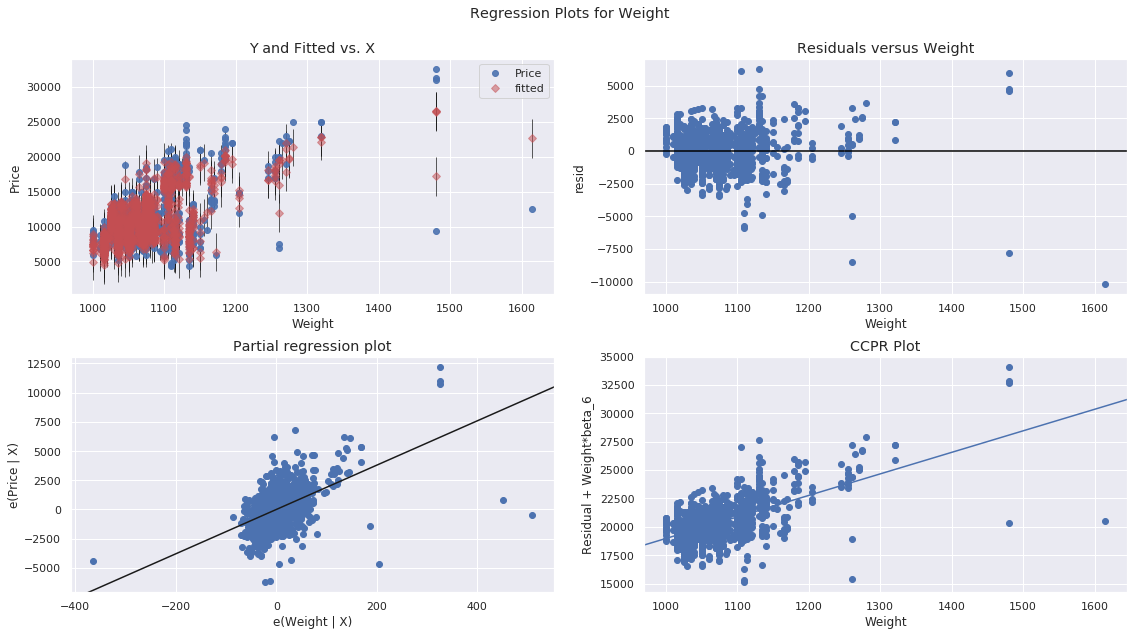

In [305]:
sm.graphics.plot_regress_exog(model,'Weight')
plt.show()

#### **Model Deletion Diagnostics (checking Outliers or Influencers)**

#### **Two Techniques** 
1. Cook's Distance 
2. Leverage value

#### **1. Cook's Distance: If Cook's distance > 1, then it's an outlier**

In [306]:
(c,_)=model.get_influence().cooks_distance
c

array([4.96301242e-03, 2.88615825e-03, 3.58665492e-03, ...,
       5.72685265e-06, 7.89998358e-04, 1.18728817e-02])

#### **Plot the influencers using the stem plot**

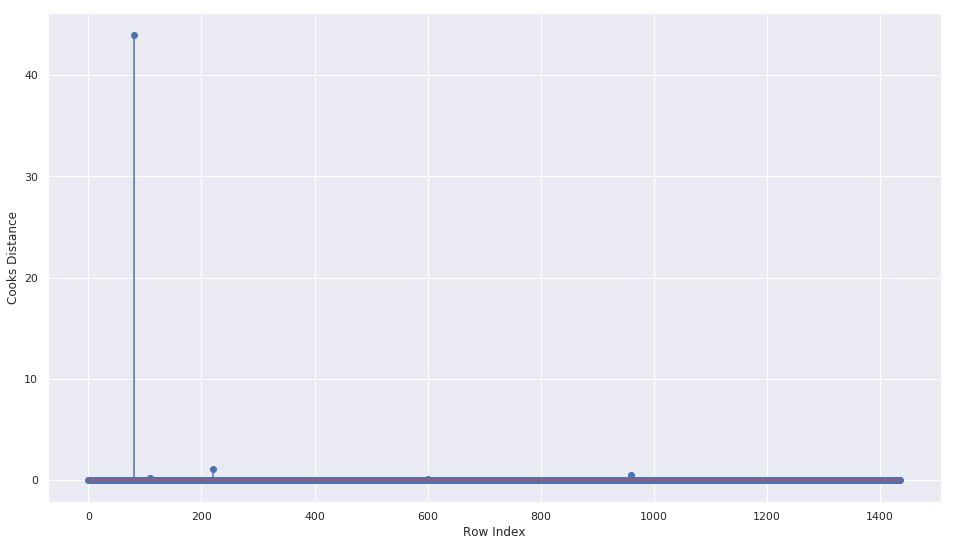

In [307]:
plt.stem(np.arange(len(cars)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

#### **Index and value of influencer where C>0.5**

In [308]:
np.argmax(c) , np.max(c)

(80, 43.95202951352482)

#### **2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers**

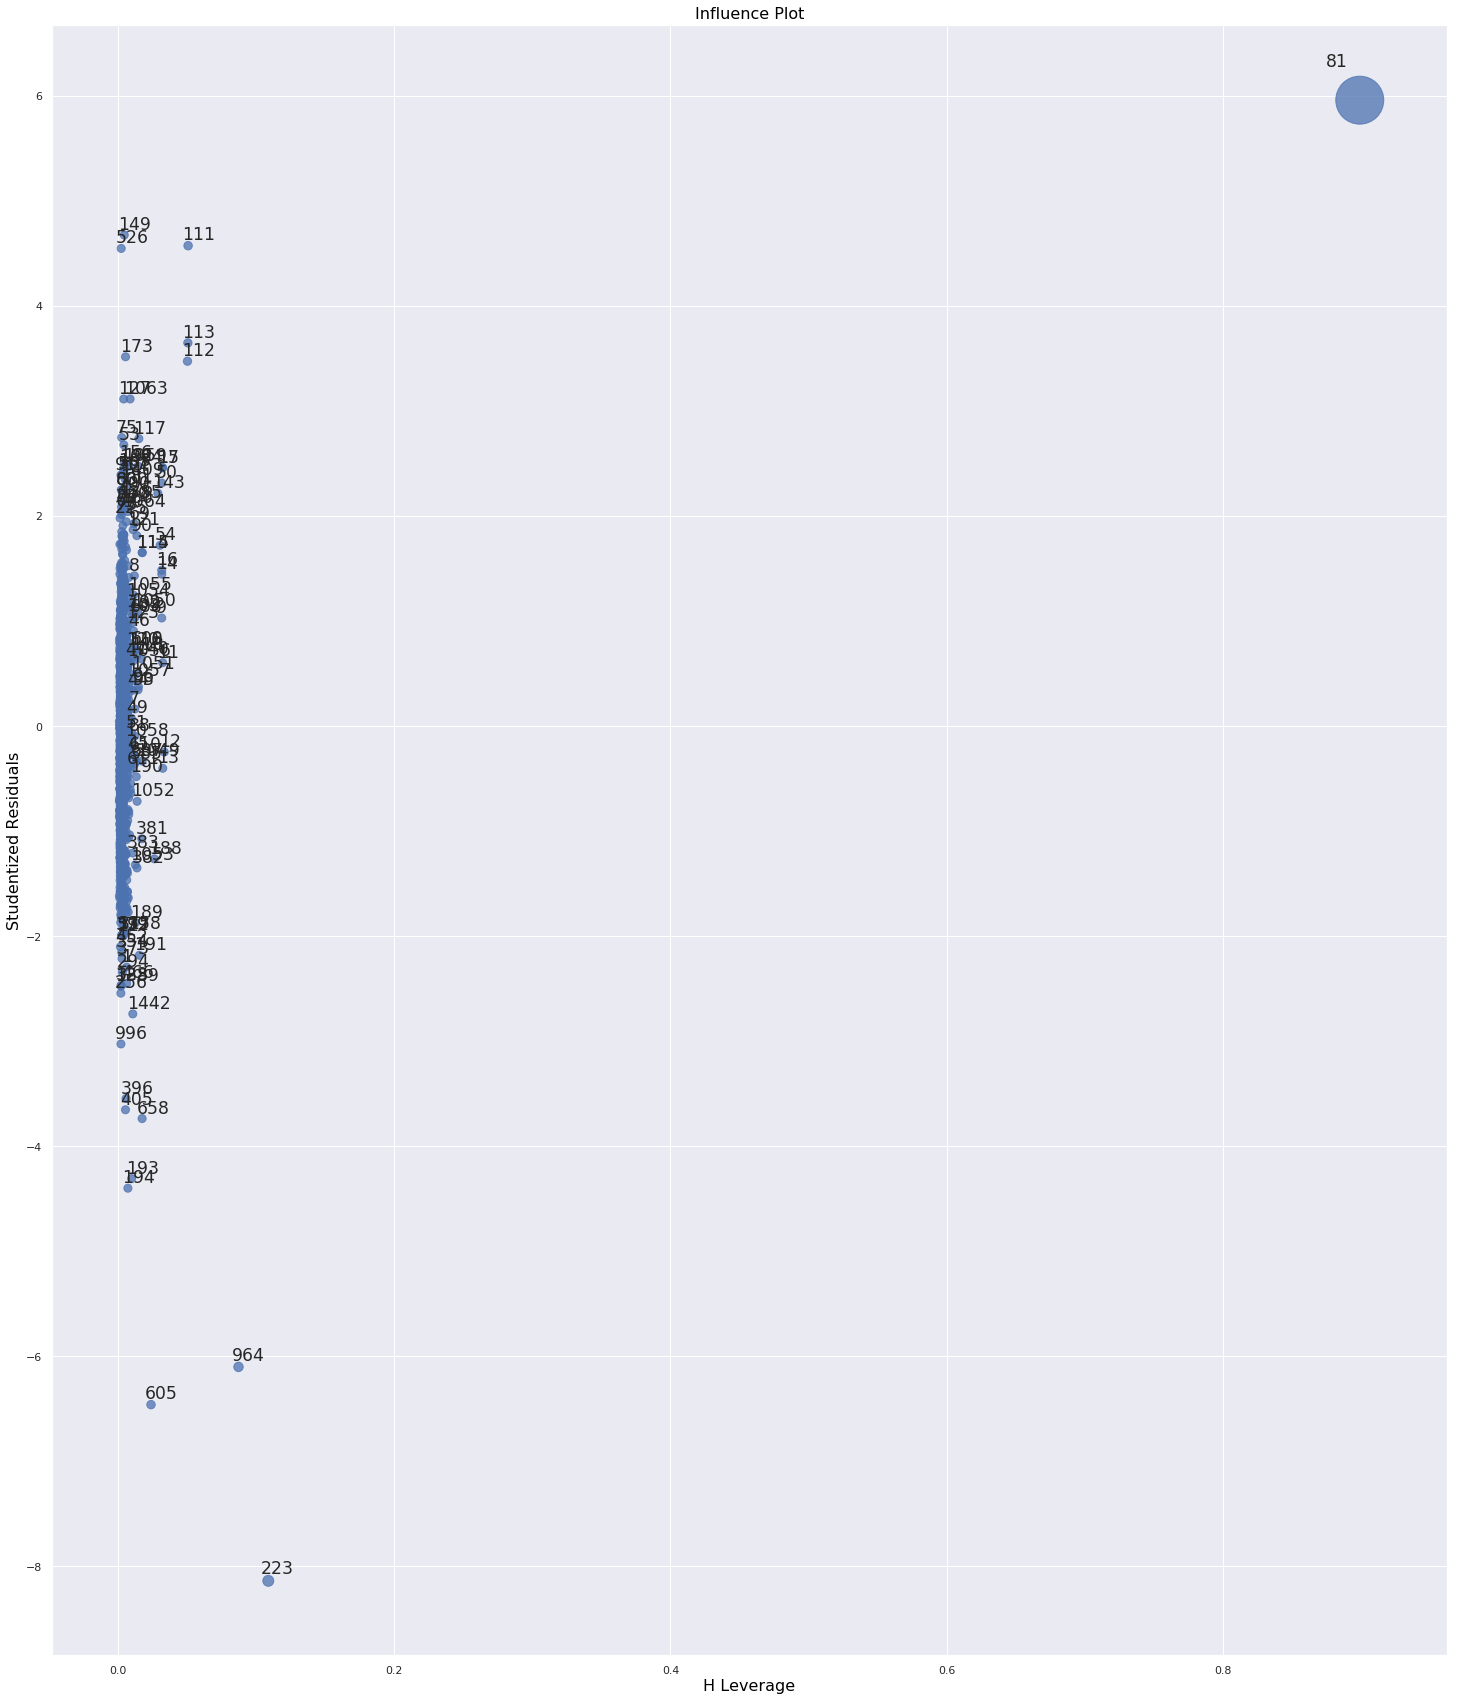

In [309]:
fig,ax=plt.subplots(figsize=(25,30))
fig=influence_plot(model,ax = ax)

In [310]:
k=cars.shape[1]
n=cars.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.031337047353760444

In [311]:
cars[cars.index.isin([80])] 

,Price,Age_Months,KM,Fuel_Type,HP,Met_Color,Automatic,CC,Doors,Weight,Price_Class,Age,KM/Month,Age-Year
Id,,,,,,,,,,,,,,
80,14900,30,22000,Petrol,97,1,0,1400,5,1110,Expensive,New Model,733.333333,2.5


#### **Improving the Model**

In [312]:
cars2=cars.copy()
cars2

,Price,Age_Months,KM,Fuel_Type,HP,Met_Color,Automatic,CC,Doors,Weight,Price_Class,Age,KM/Month,Age-Year
Id,,,,,,,,,,,,,,
1,13500,23,46986,Diesel,90,1,0,2000,3,1165,Expensive,New Model,2042.869565,1.916667
2,13750,23,72937,Diesel,90,1,0,2000,3,1165,Expensive,New Model,3171.173913,1.916667
3,13950,24,41711,Diesel,90,1,0,2000,3,1165,Expensive,New Model,1737.958333,2.000000
4,14950,26,48000,Diesel,90,0,0,2000,3,1165,Expensive,New Model,1846.153846,2.166667
5,13750,30,38500,Diesel,90,0,0,2000,3,1170,Expensive,New Model,1283.333333,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,7500,69,20544,Petrol,86,1,0,1300,3,1025,Cheap,Old,297.739130,5.750000
1439,10845,72,19000,Petrol,86,0,0,1300,3,1015,Average,Very Old,263.888889,6.000000
1440,8500,71,17016,Petrol,86,0,0,1300,3,1015,Average,Very Old,239.661972,5.916667


In [313]:
cars3=cars2.drop(cars2.index[[80]],axis=0).reset_index(drop=True)
cars3

,Price,Age_Months,KM,Fuel_Type,HP,Met_Color,Automatic,CC,Doors,Weight,Price_Class,Age,KM/Month,Age-Year
0,13500,23,46986,Diesel,90,1,0,2000,3,1165,Expensive,New Model,2042.869565,1.916667
1,13750,23,72937,Diesel,90,1,0,2000,3,1165,Expensive,New Model,3171.173913,1.916667
2,13950,24,41711,Diesel,90,1,0,2000,3,1165,Expensive,New Model,1737.958333,2.000000
3,14950,26,48000,Diesel,90,0,0,2000,3,1165,Expensive,New Model,1846.153846,2.166667
4,13750,30,38500,Diesel,90,0,0,2000,3,1170,Expensive,New Model,1283.333333,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1430,7500,69,20544,Petrol,86,1,0,1300,3,1025,Cheap,Old,297.739130,5.750000
1431,10845,72,19000,Petrol,86,0,0,1300,3,1015,Average,Very Old,263.888889,6.000000
1432,8500,71,17016,Petrol,86,0,0,1300,3,1015,Average,Very Old,239.661972,5.916667
1433,7250,70,16916,Petrol,86,1,0,1300,3,1015,Cheap,Very Old,241.657143,5.833333


#### **Model Deletion Diagnostics and Final Model**

In [314]:
while np.max(c)>0.5 :
    model=smf.ols('Price~Age_Months+KM+HP+CC+Doors+Weight',data=cars3).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    cars3=cars3.drop(cars3.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    cars3
else:
    final_model=smf.ols('Price~Age_Months+KM+HP+CC+Doors+Weight',data=cars3).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882500677450507


In [315]:
if np.max(c)>0.5:
    model=smf.ols('Price~Age_Months+KM+HP+CC+Doors+Weight',data=cars3).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    cars3=cars3.drop(cars3.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    cars3 
elif np.max(c)<0.5:
    final_model=smf.ols('Price~Age_Months+KM+HP+CC+Doors+Weight',data=cars3).fit()
    final_model.rsquared , final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8882500677450507


In [316]:
final_model.rsquared

0.8882500677450507

In [317]:
cars3

,Price,Age_Months,KM,Fuel_Type,HP,Met_Color,Automatic,CC,Doors,Weight,Price_Class,Age,KM/Month,Age-Year
0,13500,23,46986,Diesel,90,1,0,2000,3,1165,Expensive,New Model,2042.869565,1.916667
1,13750,23,72937,Diesel,90,1,0,2000,3,1165,Expensive,New Model,3171.173913,1.916667
2,13950,24,41711,Diesel,90,1,0,2000,3,1165,Expensive,New Model,1737.958333,2.000000
3,14950,26,48000,Diesel,90,0,0,2000,3,1165,Expensive,New Model,1846.153846,2.166667
4,13750,30,38500,Diesel,90,0,0,2000,3,1170,Expensive,New Model,1283.333333,2.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1427,7500,69,20544,Petrol,86,1,0,1300,3,1025,Cheap,Old,297.739130,5.750000
1428,10845,72,19000,Petrol,86,0,0,1300,3,1015,Average,Very Old,263.888889,6.000000
1429,8500,71,17016,Petrol,86,0,0,1300,3,1015,Average,Very Old,239.661972,5.916667
1430,7250,70,16916,Petrol,86,1,0,1300,3,1015,Cheap,Very Old,241.657143,5.833333


#### **Model Predictions**

In [318]:
new_data=pd.DataFrame({'Age_Months':12,"KM":40000,"HP":80,"CC":1300,"Doors":4,"Weight":1012},index=[0])
new_data

,Age_Months,KM,HP,CC,Doors,Weight
0,12,40000,80,1300,4,1012


In [319]:
final_model.predict(new_data)

0    14284.947787
dtype: float64

In [320]:
pred_y=final_model.predict(cars3)
pred_y

0       16220.867688
1       15776.420405
2       16200.687683
3       15871.936173
4       15761.554924
            ...     
1427     9124.849922
1428     8481.717648
1429     8626.218213
1430     8738.452634
1431    11116.827833
Length: 1432, dtype: float64